### Que. 1

Consider following datasets , do proper EDA (i.e. Scaling, Resampling (if needed), Outlier Handling) on each datasets 
and preapare any three classification models & select best one of them.


In [152]:
import warnings 
warnings.filterwarnings(action='ignore')

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
df = pd.read_csv("Wine.csv")
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [156]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [157]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


<Axes: >

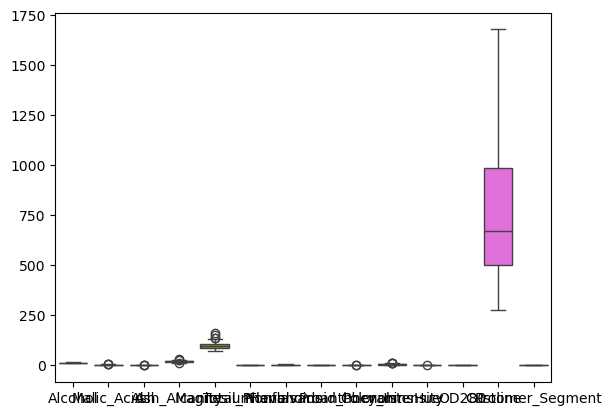

In [158]:
sns.boxplot(df)

In [159]:
def remove_outlier(df,columns):
    for column in columns:
        Q1= df[column].quantile(0.25)
        Q3= df[column].quantile(0.75)
        IQR= Q3-Q1

        lower_bound = Q1 - 0.1 * IQR
        upper_bound = Q3 + 0.1 * IQR

        df = df[(df[column]>= lower_bound) & (df[column]<=upper_bound)]

    return df    


In [ ]:
columns_to_remove = ['Malic_Acid','Ash','Ash_Alcanity','Magnesium','Proanthocyanins','Color_Intensity','Hue']
df_clean = remove_outlier(df,columns_to_remove)

### slipt data

In [186]:
x= df_clean.drop(['Customer_Segment'],axis=1)
y=df_clean['Customer_Segment']

NameError: name 'df_clean' is not defined

In [187]:
from sklearn.preprocessing import StandardScaler

scalar_std=StandardScaler()
new_x = scalar_std.fit_transform(x)

new_x = pd.DataFrame(new_x,columns=x.columns)
new_x

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [188]:
new_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    float64
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    float64
dtypes: float64(13)
memory usage: 18.2 KB


<Axes: >

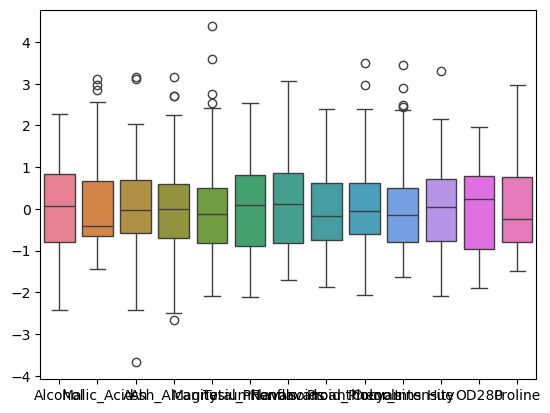

In [189]:
sns.boxplot(new_x)

In [190]:
x_clean


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035,1
23,12.85,1.60,2.52,17.8,95,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015,1
24,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845,1
34,13.51,1.80,2.65,19.0,110,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095,1
37,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105,1


In [191]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    x,y,train_size=0.8,random_state=123456
)

### logisticR

In [192]:
def create_logistic_regression_model():
    from sklearn.linear_model import LogisticRegressionCV
    
    # create model
    model = LogisticRegressionCV()
    
    # train the model
    model.fit(x_train, y_train)

    return model

### KNN

In [193]:
def create_KNN_model():
    from sklearn.neighbors import KNeighborsClassifier

    model =KNeighborsClassifier()
    model.fit(x_train,y_train)
    return model

#### Naive Bayes

In [194]:
def create_naive_bayes_model():
    from sklearn.naive_bayes import GaussianNB

    model = GaussianNB()
    model.fit(x_train, y_train)

    return model


In [195]:
def create_svm_model():
    from sklearn.svm import SVC
    model = SVC()
    model.fit(x_train, y_train)

    return model


In [196]:
from sklearn.tree import DecisionTreeClassifier
def create_Decision_Tree_model():

# create the model
   model = DecisionTreeClassifier()

# train the model
   model.fit(x_train, y_train)

   return model

In [197]:
from sklearn.ensemble import RandomForestClassifier
def create_random_forest_model():
    model = RandomForestClassifier()
    model.fit(x_train,y_train)

    return model

In [198]:
from sklearn.ensemble import AdaBoostClassifier
def create_adaboost_model():
    model = AdaBoostClassifier()
    model.fit(x_train,y_train)

    return model

In [199]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def evaluate_model(model):
    y_pred = model.predict(x_test)

    # evaluate the model using following metrics
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average='micro')
    recall = recall_score(y_test,y_pred,average='micro')
    f1 = f1_score(y_test,y_pred,average='micro')

    return f"{accuracy:.2f}" ,f"{precision:.2f}",f"{recall:.2f}",f"{f1:.2f}"

In [200]:
# list to keep all models
models =[]
#create all the models

models.append({"name" : "Logistic Regression",'model':create_logistic_regression_model() })
models.append({"name" : "naive bayes",'model':create_naive_bayes_model() })
models.append({"name" : "KNN",'model':create_KNN_model() })
models.append({"name" : "SVM",'model':create_svm_model() })
models.append({'name' : "Decision Tree" ,'model':create_Decision_Tree_model()})
models.append({'name' : "random forest model" , "model": create_random_forest_model()})
models.append({'name' : 'adaboost model','model':create_adaboost_model()})



In [201]:
models

[{'name': 'Logistic Regression', 'model': LogisticRegressionCV()},
 {'name': 'naive bayes', 'model': GaussianNB()},
 {'name': 'KNN', 'model': KNeighborsClassifier()},
 {'name': 'SVM', 'model': SVC()},
 {'name': 'Decision Tree', 'model': DecisionTreeClassifier()},
 {'name': 'random forest model', 'model': RandomForestClassifier()},
 {'name': 'adaboost model', 'model': AdaBoostClassifier()}]

In [202]:
#get the model evaluated
for model_info in models:
    accuracy,precision,recall,f1=evaluate_model(model_info['model'])
    #keep the metrics
    model_info['accuracy'] = accuracy
    model_info['precision'] = precision
    model_info['recall'] = recall
    model_info['f1'] = f1


In [203]:
# create the evaluation dataframe
evaluation_df = pd.DataFrame(models,columns=['name','accuracy','precision','recall','f1'])
evaluation_df

,name,accuracy,precision,recall,f1
0,Logistic Regression,1.00,1.00,1.00,1.00
1,naive bayes,1.00,1.00,1.00,1.00
2,KNN,0.83,0.83,0.83,0.83
3,SVM,0.75,0.75,0.75,0.75
4,Decision Tree,0.97,0.97,0.97,0.97
5,random forest model,1.00,1.00,1.00,1.00
6,adaboost model,0.97,0.97,0.97,0.97


In [204]:
def evaluate_model(model):
    y_pred = model.predict(x_train)

    # evaluate the model using following metrics
    accuracy = accuracy_score(y_train,y_pred)
    precision = precision_score(y_train,y_pred,average='micro')
    recall = recall_score(y_train,y_pred,average='micro')
    f1 = f1_score(y_train,y_pred,average='micro')

    return f"{accuracy:.2f}" ,f"{precision:.2f}",f"{recall:.2f}",f"{f1:.2f}"

In [205]:
for model_info in models:
    accuracy,precision,recall,f1=evaluate_model(model_info['model'])
    #keep the metrics
    model_info['accuracy'] = accuracy
    model_info['precision'] = precision
    model_info['recall'] = recall
    model_info['f1'] = f1

In [206]:
evaluation_df = pd.DataFrame(models,columns=['name','accuracy','precision','recall','f1'])
evaluation_df

,name,accuracy,precision,recall,f1
0,Logistic Regression,0.97,0.97,0.97,0.97
1,naive bayes,0.99,0.99,0.99,0.99
2,KNN,0.77,0.77,0.77,0.77
3,SVM,0.70,0.70,0.70,0.70
4,Decision Tree,1.00,1.00,1.00,1.00
5,random forest model,1.00,1.00,1.00,1.00
6,adaboost model,0.96,0.96,0.96,0.96
